In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/E8TQSD

In [22]:
cbd = pd.read_csv('./datasets/cannabis2/Replication_Data.csv')
cbd.head()

,test_id,test_strain,leafly_strain,no_match,thc_max,cbd_max,date_test,year,org_name,org_active,...,chemotype,strain_category,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop
0,19,Dutch Hawaiian,dutch-hawaiian,0,20.1309,0.54,6/19/2014 11:33,2014,F.O.L GENETICS,1,...,1,Sativa,619.0,141.0,425.0,1.0,1.0,0.0,0.0,1.0
1,20,Shiska Berry,shishkaberry,0,13.5019,0.00,6/19/2014 11:36,2014,F.O.L GENETICS,1,...,1,Indica,255.0,118.0,139.0,1.0,1.0,0.0,0.0,1.0
2,21,Sleestack,sleestack,0,9.9139,0.00,6/19/2014 11:42,2014,F.O.L GENETICS,1,...,1,Sativa,1276.0,151.0,63.0,1.0,1.0,0.0,0.0,1.0
3,22,Space Needle,NaN,1,10.8132,0.00,6/19/2014 11:45,2014,F.O.L GENETICS,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,Double Purple Doja,double-purple-doja,0,11.6702,0.00,6/20/2014 20:34,2014,F.O.L GENETICS,1,...,1,Indica,1115.0,151.0,52.0,1.0,1.0,0.0,0.0,1.0


In [23]:
cbd.columns

Index(['test_id', 'test_strain', 'leafly_strain', 'no_match', 'thc_max',
       'cbd_max', 'date_test', 'year', 'org_name', 'org_active', 'lab_name',
       'inventory_type', 'chemotype', 'strain_category',
       'strain_leafly_page_rank', 'strain_leafly_review_rank', 'strain_tests',
       'strain_chemotype', 'strain_prop_chemotype1', 'strain_prop_chemotype2',
       'strain_prop_chemotype3', 'strain_modal_chemo_prop'],
      dtype='object')

In [24]:
cbd.shape

(215285, 22)

In [25]:
leafly = pd.read_csv('./datasets/cannabis2/cannabis.csv')
leafly.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [26]:
leafly.shape

(2351, 6)

In [27]:
matches = set()

for strain1 in cbd['leafly_strain']:
    for strain2 in leafly['Strain']:
        if strain1 == strain2.lower():
            matches.add(strain1)
matches

{'mandala-1',
 'honey-rock',
 'blueberry-pie',
 'black-afghan',
 'west-coast-dawg',
 'iced-grapefruit',
 'matanuska-thunder-fuck',
 'chemdawg-4',
 'pineapple-cookies',
 'blue-venom',
 'sweet-and-sour-widow',
 'phantom-og',
 'frida',
 'querkle',
 'dr-grinspoon',
 'juicy-jack',
 'purple-paralysis',
 'blue-diamond',
 'og-cheese',
 'purple-punch',
 'flaming-cookies',
 'rudeboi-og',
 'cbd-critical-cure',
 'super-sour-widow',
 'purple-headband',
 'kona-gold',
 'red-dragon',
 'fruit-punch',
 'space-cream',
 'black-russian',
 'sfv-og',
 'blue-rhino',
 'frankenstein',
 'blue-galaxy',
 'twisted-citrus',
 'dutch-thunder-fuck',
 'mammoth',
 'sour-patch-kiss',
 'grape-inferno',
 'gumbo',
 'cat-piss',
 'white-nightmare',
 'amnesia-haze',
 'rollex-og-kush',
 'silver-haze',
 'sour-urkle',
 'cinderellas-dream',
 'deadwood',
 'sfv-og-kush',
 'purple-sour-diesel',
 'black-jack',
 'martian-mean-green',
 'satori',
 'afghan-kush',
 'vcdc',
 'cherry-pie-kush',
 'rockstar',
 'cannalope-haze',
 'fruity-chronic

In [28]:
len(matches)

1309

In [29]:
cbd['leafly_strain'].value_counts().shape

(1318,)

In [30]:
cbd[cbd['test_strain'] == 'AK-47']

,test_id,test_strain,leafly_strain,no_match,thc_max,cbd_max,date_test,year,org_name,org_active,...,chemotype,strain_category,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop
62,82,AK-47,ak-47,0,14.508050,0.010000,6/29/2014 16:26,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
436,462,AK-47,ak-47,0,7.572420,0.010000,8/3/2014 11:52,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
655,691,AK-47,ak-47,0,15.523020,0.010000,8/15/2014 13:47,2014,AURICAG,1,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
792,833,AK-47,ak-47,0,9.891280,0.030000,8/21/2014 12:12,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
956,1007,AK-47,ak-47,0,39.459630,0.538000,8/31/2014 14:37,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
1262,1323,AK-47,ak-47,0,46.985390,0.701000,9/11/2014 12:32,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
1519,1647,AK-47,ak-47,0,46.985390,0.701000,9/18/2014 14:12,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
1542,1671,AK-47,ak-47,0,7.628677,0.001000,9/19/2014 12:33,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
1545,1674,AK-47,ak-47,0,6.385076,0.001000,9/19/2014 12:45,2014,PENINSULA ORGANICS,0,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317
1594,1725,AK-47,ak-47,0,20.957630,0.160000,9/21/2014 17:28,2014,ROOT DOWN,1,...,1,Hybrid,16.0,15.0,1646.0,1.0,0.993317,0.005468,0.001215,0.993317


In [31]:
cbd['no_match'].value_counts()

0    153363
1     61922
Name: no_match, dtype: int64

In [32]:
leafly.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'], dtype='object')

In [33]:
cbd_cols = ['leafly_strain', 'thc_max', 'cbd_max', 'chemotype']
leafly_cols = ['Strain', 'Type', 'Rating', 'Effects']

cbd = cbd[cbd_cols]
leafly = leafly[leafly_cols]

In [34]:
cbd.head()

,leafly_strain,thc_max,cbd_max,chemotype
0,dutch-hawaiian,20.1309,0.54,1
1,shishkaberry,13.5019,0.00,1
2,sleestack,9.9139,0.00,1
3,NaN,10.8132,0.00,1
4,double-purple-doja,11.6702,0.00,1


In [35]:
cbd = cbd.groupby('leafly_strain', as_index=False).mean()
cbd.shape

(1318, 4)

In [36]:
leafly['strain'] = [strain.lower() for strain in leafly['Strain']]
leafly.head()

,Strain,Type,Rating,Effects,strain
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed",100-og
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic",98-white-widow
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative",1024
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted",13-dawgs
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative",24k-gold


In [37]:
leafly = leafly.drop('Strain', axis=1)
leafly.head()

,Type,Rating,Effects,strain
0,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed",100-og
1,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic",98-white-widow
2,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative",1024
3,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted",13-dawgs
4,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative",24k-gold


In [38]:
leafly.shape

(2351, 4)

In [39]:
leafly = leafly[leafly['strain'].isin(matches)]
leafly.shape

(1309, 4)

In [40]:
cbd = cbd[cbd['leafly_strain'].isin(matches)]
cbd.shape

(1309, 4)

In [41]:
cbd.columns

Index(['leafly_strain', 'thc_max', 'cbd_max', 'chemotype'], dtype='object')

In [42]:
new_columns = cbd.columns.tolist()
new_columns[0] = 'strain'
new_columns

['strain', 'thc_max', 'cbd_max', 'chemotype']

In [43]:
cbd.columns = new_columns
cbd.head()

,strain,thc_max,cbd_max,chemotype
0,1024,55.635669,2.017842,1.0
1,24k-gold,30.195809,0.244466,1.0
2,3-kings,28.503718,0.164046,1.0
3,3x-crazy,16.852255,0.042518,1.0
4,501st-og,29.897509,0.142379,1.0


In [44]:
df = pd.merge(leafly, cbd, on='strain')
df.head()

,Type,Rating,Effects,strain,thc_max,cbd_max,chemotype
0,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative",1024,55.635669,2.017842,1.0
1,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative",24k-gold,30.195809,0.244466,1.0
2,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry",3-kings,28.503718,0.164046,1.0
3,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted",3x-crazy,16.852255,0.042518,1.0
4,hybrid,4.5,"Relaxed,Euphoric,Sleepy,Happy,Talkative",501st-og,29.897509,0.142379,1.0


In [45]:
df.shape

(1309, 7)

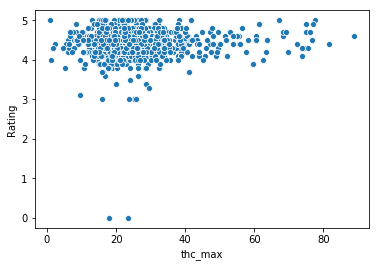

In [46]:
sns.scatterplot(x='thc_max', y='Rating', data=df)
plt.show()

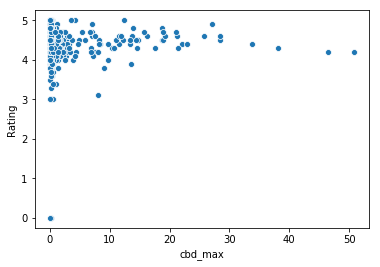

In [47]:
sns.scatterplot(x='cbd_max', y='Rating', data=df)
plt.show()

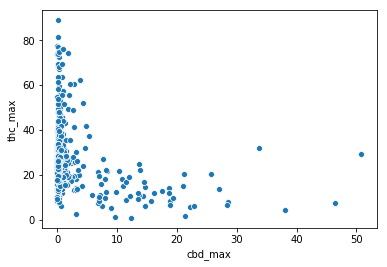

In [48]:
sns.scatterplot(x='cbd_max', y='thc_max', data=df)
plt.show()

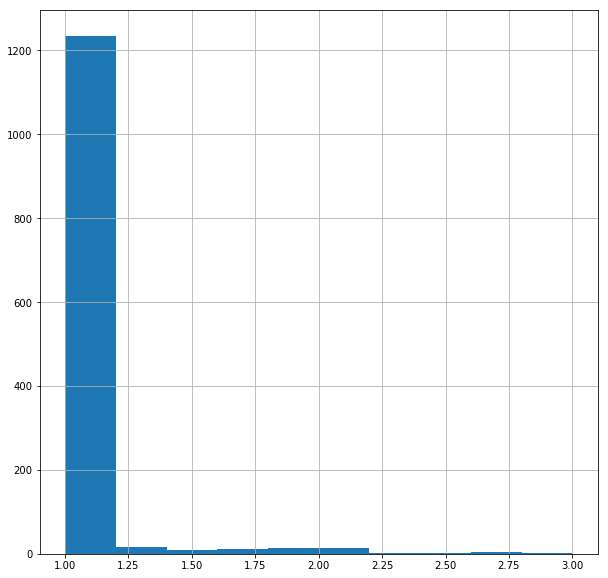

In [49]:
df['chemotype'].hist(figsize=(10, 10))
plt.show()

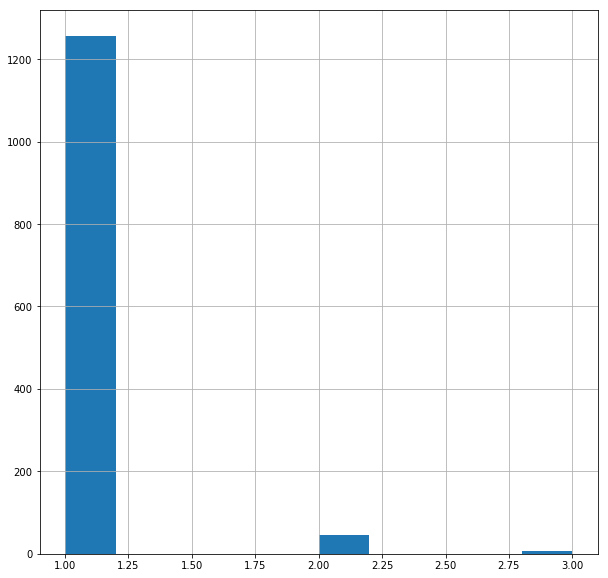

In [50]:
df['chemotype'][df['chemotype'] < 1.5] = 1.0
df['chemotype'][(df['chemotype'] >= 1.5) & (df['chemotype'] <= 2.5)] = 2.0
df['chemotype'][df['chemotype'] > 2.5] = 3.0
df['chemotype'].hist(figsize=(10, 10))
plt.show()

In [51]:
df['high_thc'] = 0
df['high_thc'][df['chemotype'] == 1.0] = 1

df['balanced'] = 0
df['balanced'][df['chemotype'] == 2.0] = 1

df['high_cbd'] = 0
df['high_cbd'][df['chemotype'] == 3.0] = 1

df = df.drop('chemotype', axis=1)
df.head()

,Type,Rating,Effects,strain,thc_max,cbd_max,high_thc,balanced,high_cbd
0,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative",1024,55.635669,2.017842,1,0,0
1,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative",24k-gold,30.195809,0.244466,1,0,0
2,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry",3-kings,28.503718,0.164046,1,0,0
3,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted",3x-crazy,16.852255,0.042518,1,0,0
4,hybrid,4.5,"Relaxed,Euphoric,Sleepy,Happy,Talkative",501st-og,29.897509,0.142379,1,0,0


In [52]:
effects_set = set()
df['Effects'] = df['Effects'].str.split(',')
for effects in df['Effects']:
    for effect in effects:
        effects_set.add(effect)
effects_set

{'Aroused',
 'Creative',
 'Energetic',
 'Euphoric',
 'Focused',
 'Giggly',
 'Happy',
 'Hungry',
 'None',
 'Relaxed',
 'Sleepy',
 'Talkative',
 'Tingly',
 'Uplifted'}

In [53]:
df.head()

,Type,Rating,Effects,strain,thc_max,cbd_max,high_thc,balanced,high_cbd
0,sativa,4.4,"[Uplifted, Happy, Relaxed, Energetic, Creative]",1024,55.635669,2.017842,1,0,0
1,hybrid,4.6,"[Happy, Relaxed, Euphoric, Uplifted, Talkative]",24k-gold,30.195809,0.244466,1,0,0
2,hybrid,4.4,"[Relaxed, Euphoric, Happy, Uplifted, Hungry]",3-kings,28.503718,0.164046,1,0,0
3,indica,4.4,"[Relaxed, Tingly, Happy, Euphoric, Uplifted]",3x-crazy,16.852255,0.042518,1,0,0
4,hybrid,4.5,"[Relaxed, Euphoric, Sleepy, Happy, Talkative]",501st-og,29.897509,0.142379,1,0,0


In [54]:
for effect in effects_set:
    df[effect] = 0
df.head()

,Type,Rating,Effects,strain,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,...,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
0,sativa,4.4,"[Uplifted, Happy, Relaxed, Energetic, Creative]",1024,55.635669,2.017842,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hybrid,4.6,"[Happy, Relaxed, Euphoric, Uplifted, Talkative]",24k-gold,30.195809,0.244466,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hybrid,4.4,"[Relaxed, Euphoric, Happy, Uplifted, Hungry]",3-kings,28.503718,0.164046,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indica,4.4,"[Relaxed, Tingly, Happy, Euphoric, Uplifted]",3x-crazy,16.852255,0.042518,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hybrid,4.5,"[Relaxed, Euphoric, Sleepy, Happy, Talkative]",501st-og,29.897509,0.142379,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
for i, row in df.iterrows():
    for effect in row['Effects']:
        df.set_value(i, effect, 1)
df.head()

,Type,Rating,Effects,strain,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,...,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
0,sativa,4.4,"[Uplifted, Happy, Relaxed, Energetic, Creative]",1024,55.635669,2.017842,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,hybrid,4.6,"[Happy, Relaxed, Euphoric, Uplifted, Talkative]",24k-gold,30.195809,0.244466,1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2,hybrid,4.4,"[Relaxed, Euphoric, Happy, Uplifted, Hungry]",3-kings,28.503718,0.164046,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0
3,indica,4.4,"[Relaxed, Tingly, Happy, Euphoric, Uplifted]",3x-crazy,16.852255,0.042518,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
4,hybrid,4.5,"[Relaxed, Euphoric, Sleepy, Happy, Talkative]",501st-og,29.897509,0.142379,1,0,0,0,...,1,1,0,1,0,0,1,0,1,0


In [56]:

df.columns

Index(['Type', 'Rating', 'Effects', 'strain', 'thc_max', 'cbd_max', 'high_thc',
       'balanced', 'high_cbd', 'Focused', 'Giggly', 'Creative', 'Uplifted',
       'Talkative', 'Happy', 'Energetic', 'Euphoric', 'Tingly', 'None',
       'Relaxed', 'Hungry', 'Sleepy', 'Aroused'],
      dtype='object')

In [57]:
df['Type'].value_counts()

hybrid    659
indica    400
sativa    250
Name: Type, dtype: int64

In [58]:
df.head()

,Type,Rating,Effects,strain,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,...,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
0,sativa,4.4,"[Uplifted, Happy, Relaxed, Energetic, Creative]",1024,55.635669,2.017842,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,hybrid,4.6,"[Happy, Relaxed, Euphoric, Uplifted, Talkative]",24k-gold,30.195809,0.244466,1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2,hybrid,4.4,"[Relaxed, Euphoric, Happy, Uplifted, Hungry]",3-kings,28.503718,0.164046,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0
3,indica,4.4,"[Relaxed, Tingly, Happy, Euphoric, Uplifted]",3x-crazy,16.852255,0.042518,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
4,hybrid,4.5,"[Relaxed, Euphoric, Sleepy, Happy, Talkative]",501st-og,29.897509,0.142379,1,0,0,0,...,1,1,0,1,0,0,1,0,1,0


In [59]:
hybrid = df[df['Type'] == 'hybrid'].sample(n=250, random_state=42)
indica = df[df['Type'] == 'indica'].sample(n=250, random_state=42)
sativa = df[df['Type'] == 'sativa']

df = pd.concat([hybrid, indica, sativa])

In [60]:
df = df.drop('strain', axis=1)
df.head()

,Type,Rating,Effects,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,Giggly,...,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
1252,hybrid,3.9,"[Relaxed, Hungry, Happy, Euphoric, Uplifted]",21.582383,0.285816,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
823,hybrid,4.4,"[Relaxed, Euphoric, Uplifted, Happy, Creative]",22.355860,0.070160,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
263,hybrid,4.3,"[Euphoric, Uplifted, Relaxed, Tingly, Happy]",25.840926,0.180041,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
636,hybrid,4.2,"[Relaxed, Happy, Euphoric, Uplifted, Hungry]",18.474099,0.168494,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
180,hybrid,4.7,"[Relaxed, Euphoric, Happy, Uplifted, Hungry]",34.605095,0.262401,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [61]:
effects_set.remove('None')
effects = list(effects_set)

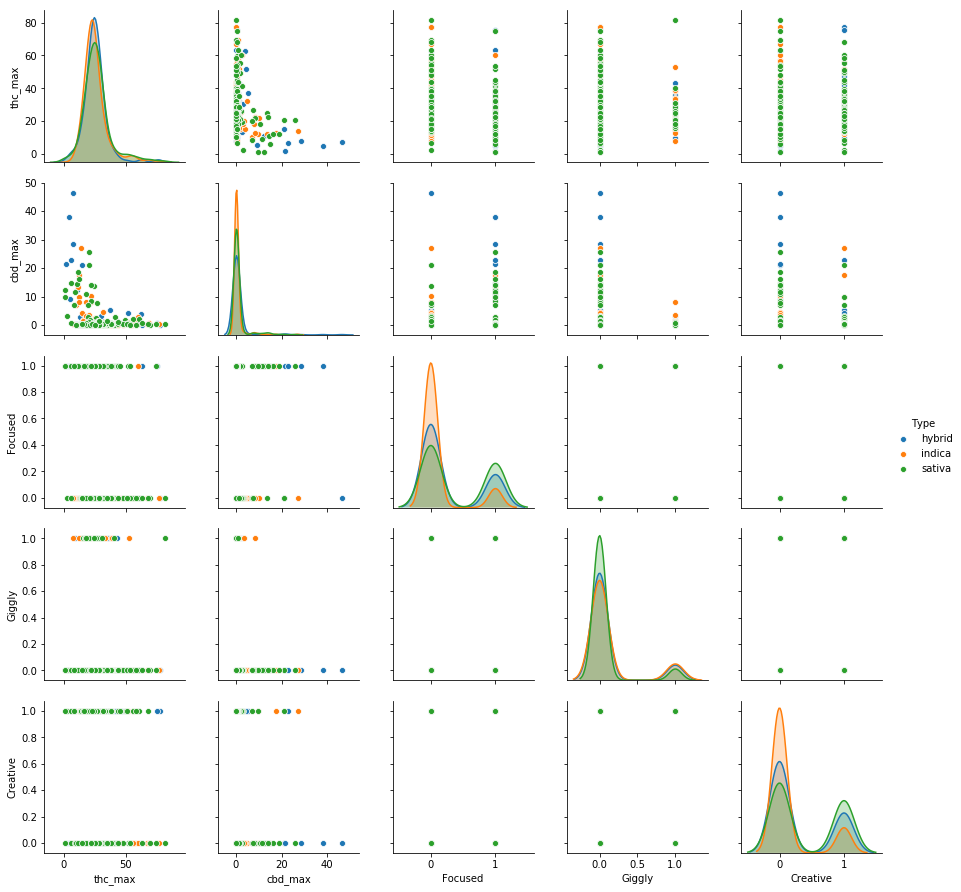

In [62]:
compare = ['thc_max', 'cbd_max', 'Type'] + effects[:3]
sns.pairplot(data=df[compare], hue='Type')
plt.show()

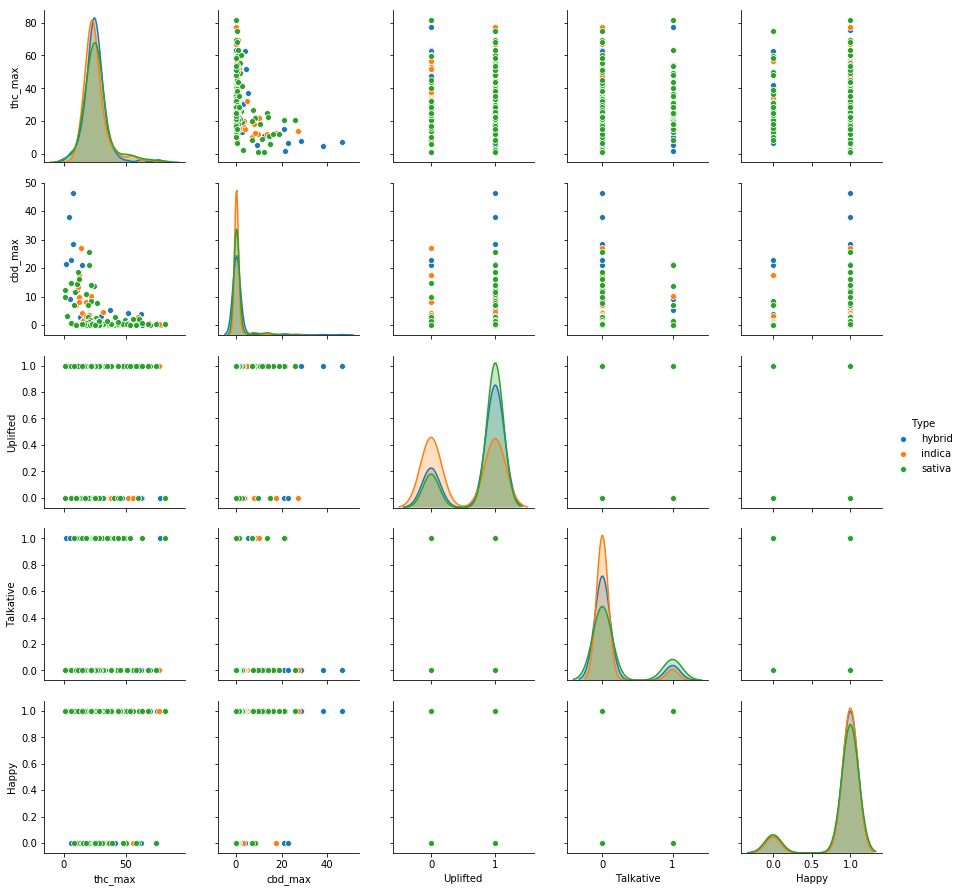

In [63]:
compare = ['thc_max', 'cbd_max', 'Type'] + effects[3:6]
sns.pairplot(data=df[compare], hue='Type')
plt.show()

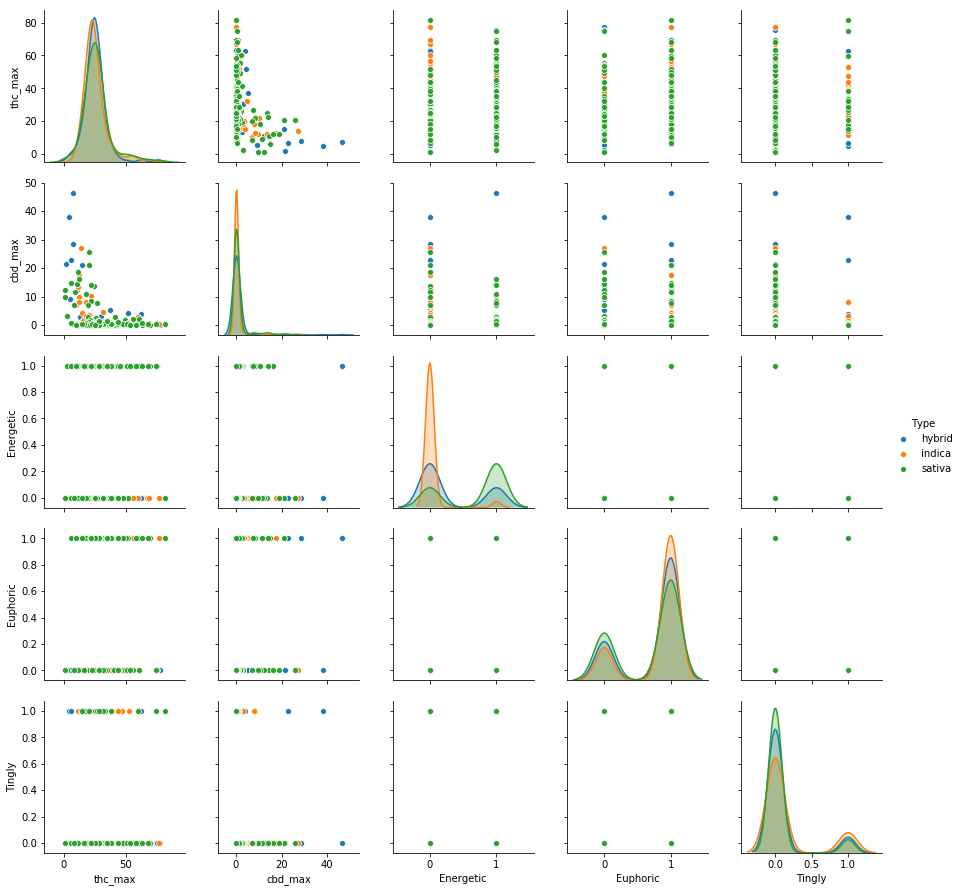

In [64]:
compare = ['thc_max', 'cbd_max', 'Type'] + effects[6:9]
sns.pairplot(data=df[compare], hue='Type')
plt.show()

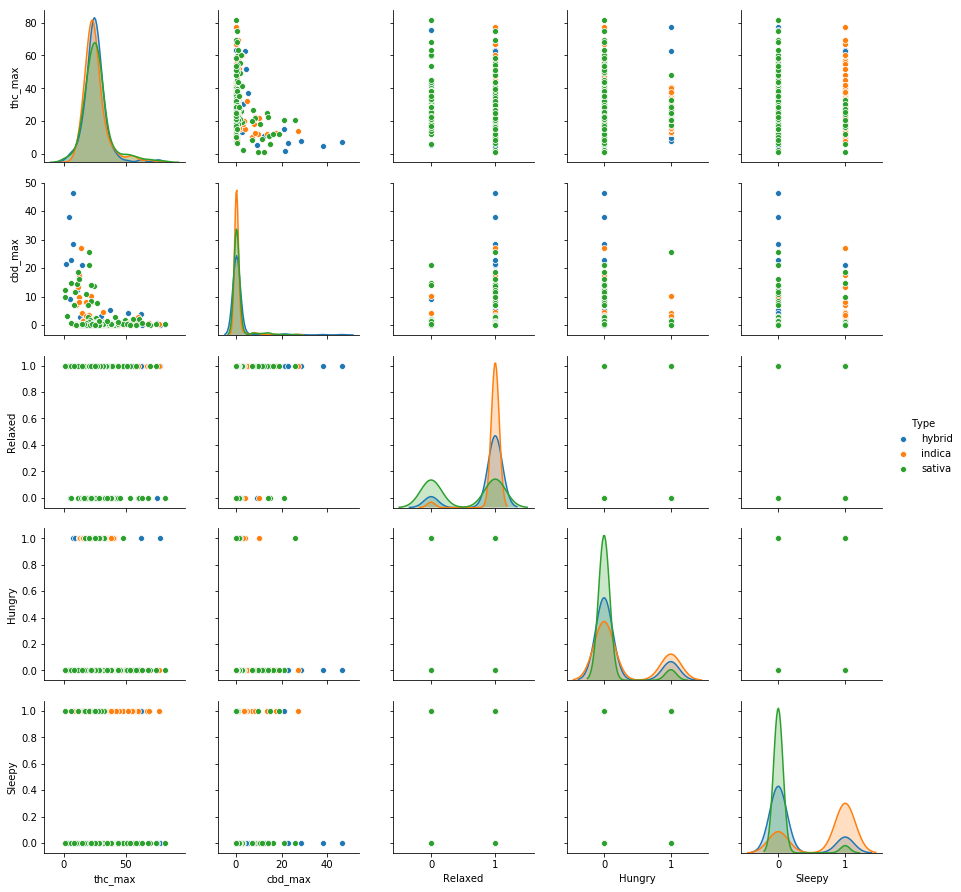

In [65]:
compare = ['thc_max', 'cbd_max', 'Type'] + effects[9:12]
sns.pairplot(data=df[compare], hue='Type')
plt.show()

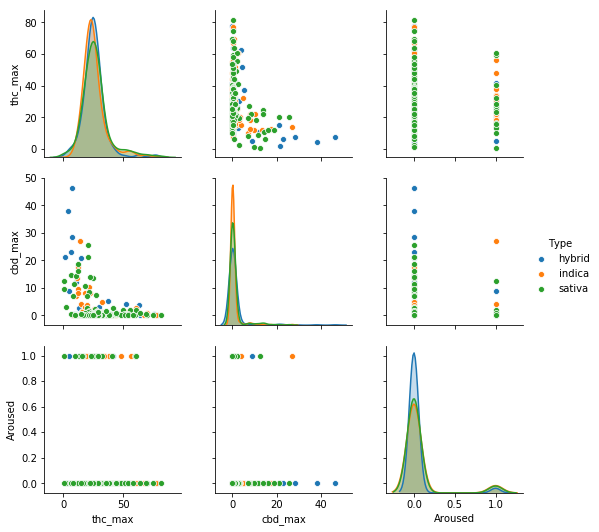

In [66]:
compare = ['thc_max', 'cbd_max', 'Type'] + effects[12:]
sns.pairplot(data=df[compare], hue='Type')
plt.show()

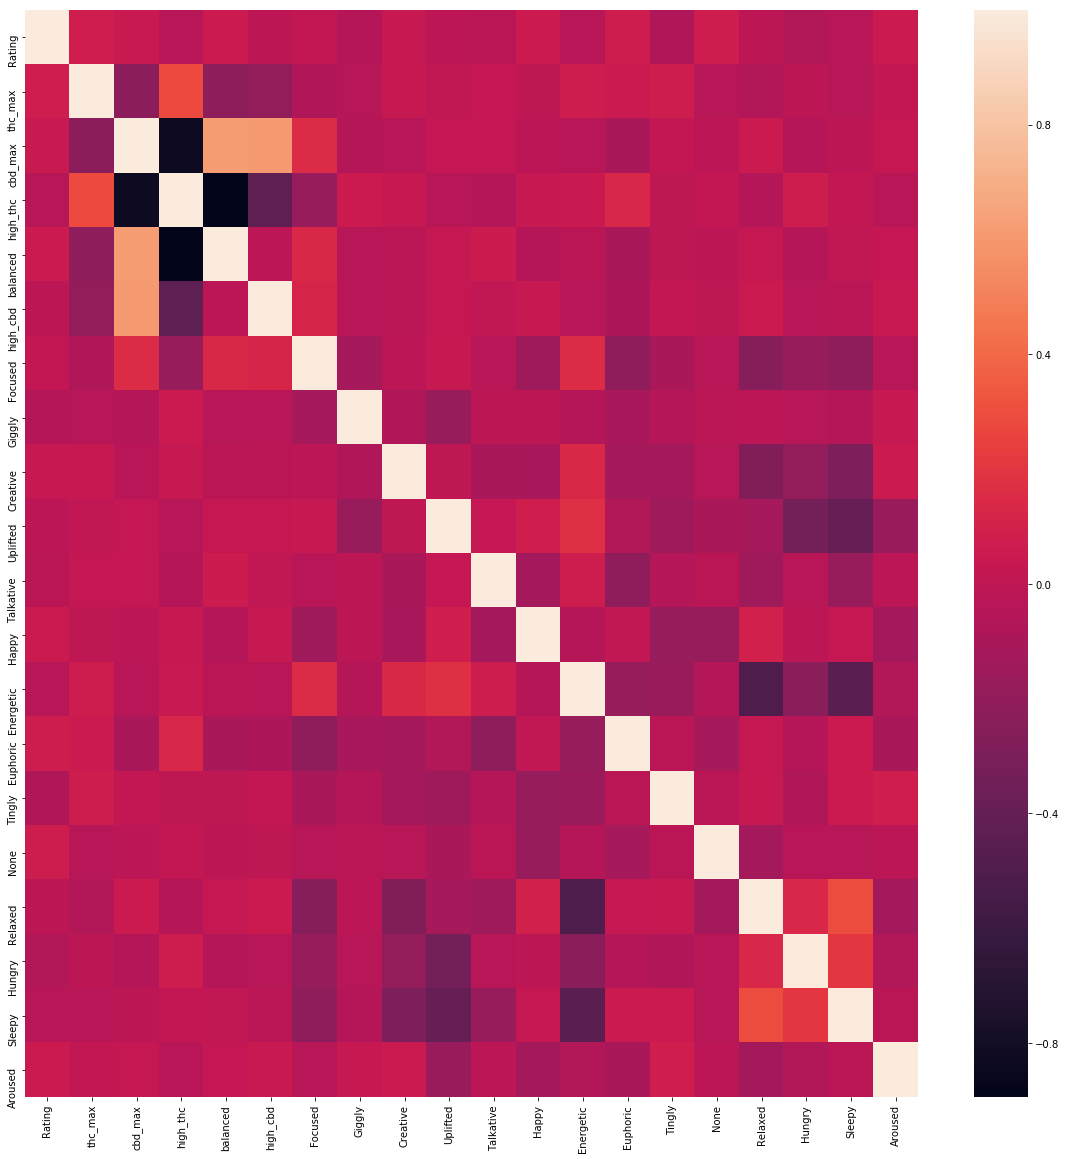

In [67]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr())
plt.show()

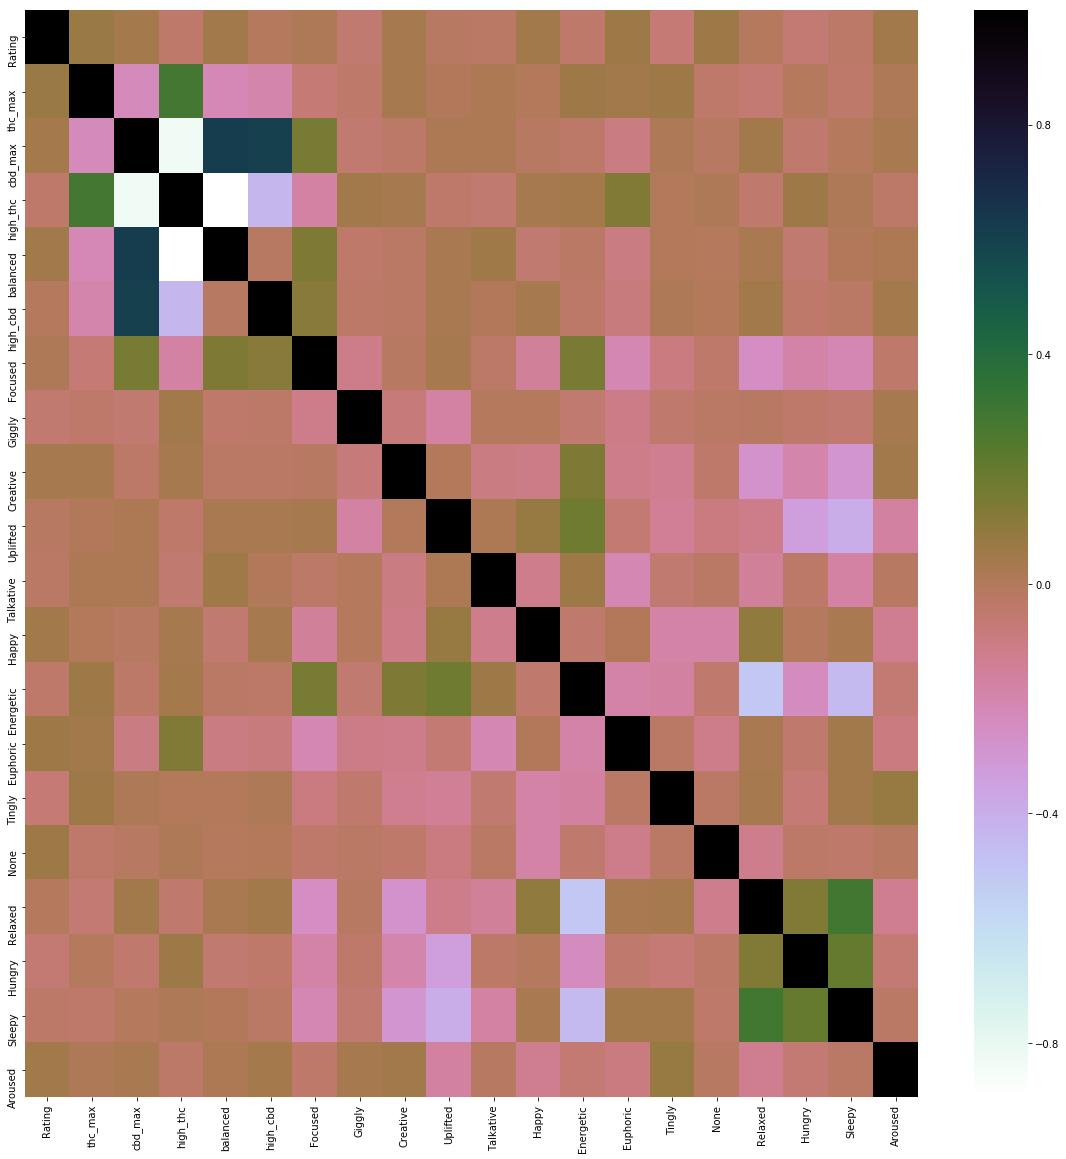

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='cubehelix_r')
plt.show()

In [69]:
df.corr()

,Rating,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,Giggly,Creative,Uplifted,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
Rating,1.000000,0.073633,0.039398,-0.039937,0.048643,-0.008777,0.012728,-0.056734,0.038008,-0.017707,-0.024342,0.050671,-0.036445,0.061871,-0.072146,0.060617,-0.009773,-0.061677,-0.034825,0.050195
thc_max,0.073633,1.000000,-0.232552,0.284747,-0.218690,-0.195607,-0.069785,-0.036118,0.037509,0.003671,0.019052,-0.001265,0.066975,0.046233,0.061292,-0.037059,-0.059453,-0.009383,-0.036423,0.008970
cbd_max,0.039398,-0.232552,1.000000,-0.828607,0.620604,0.601011,0.155240,-0.054791,-0.031241,0.022451,0.016470,-0.017268,-0.031741,-0.098102,0.015572,-0.015535,0.046230,-0.050155,-0.013250,0.025719
high_thc,-0.039937,0.284747,-0.828607,1.000000,-0.894303,-0.432487,-0.174126,0.052503,0.030797,-0.038630,-0.053373,0.034572,0.038658,0.128922,-0.003170,0.013159,-0.045598,0.065094,0.010301,-0.033671
balanced,0.048643,-0.218690,0.620604,-0.894303,1.000000,-0.016676,0.136875,-0.042395,-0.021753,0.028858,0.055389,-0.053953,-0.026013,-0.099759,-0.002254,-0.011768,0.026896,-0.050835,0.002669,0.016857
high_cbd,-0.008777,-0.195607,0.601011,-0.432487,-0.016676,1.000000,0.113282,-0.031893,-0.024984,0.028170,0.007653,0.031464,-0.033966,-0.087061,0.011626,-0.005691,0.047693,-0.043022,-0.028395,0.041271
Focused,0.012728,-0.069785,0.155240,-0.174126,0.136875,0.113282,1.000000,-0.112569,-0.018690,0.036527,-0.034960,-0.150711,0.152867,-0.210980,-0.093604,-0.038736,-0.254030,-0.177483,-0.212653,-0.037843
Giggly,-0.056734,-0.036118,-0.054791,0.052503,-0.042395,-0.031893,-0.112569,1.000000,-0.080232,-0.171484,-0.006584,-0.011056,-0.054369,-0.109336,-0.043821,-0.022506,-0.015513,-0.039930,-0.057606,0.037277
Creative,0.038008,0.037509,-0.031241,0.030797,-0.021753,-0.024984,-0.018690,-0.080232,1.000000,-0.002276,-0.095406,-0.102730,0.139891,-0.111485,-0.126887,-0.040829,-0.279954,-0.195915,-0.290003,0.051011
Uplifted,-0.017707,0.003671,0.022451,-0.038630,0.028858,0.028170,0.036527,-0.171484,-0.002276,1.000000,0.017859,0.077614,0.176090,-0.060189,-0.139569,-0.094106,-0.114490,-0.334726,-0.395088,-0.162531


In [70]:
df.corr()[abs(df.corr()) > 0.8]

,Rating,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,Giggly,Creative,Uplifted,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
Rating,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thc_max,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cbd_max,NaN,NaN,1.000000,-0.828607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_thc,NaN,NaN,-0.828607,1.000000,-0.894303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balanced,NaN,NaN,NaN,-0.894303,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_cbd,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Focused,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Giggly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Creative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uplifted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.describe()

,Rating,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,Giggly,Creative,Uplifted,Talkative,Happy,Energetic,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,4.409600,26.012379,1.067248,0.958667,0.033333,0.008000,0.272000,0.112000,0.293333,0.688000,0.137333,0.890667,0.346667,0.75200,0.124000,0.004000,0.780000,0.186667,0.313333,0.058667
std,0.268932,10.176251,3.738421,0.199193,0.179625,0.089144,0.445287,0.315577,0.455594,0.463619,0.344429,0.312265,0.476226,0.43214,0.329801,0.063161,0.414523,0.389904,0.464158,0.235157
min,3.000000,0.796967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,20.556622,0.156355,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.400000,24.718928,0.255991,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.600000,29.232007,0.413616,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,81.500000,46.396242,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


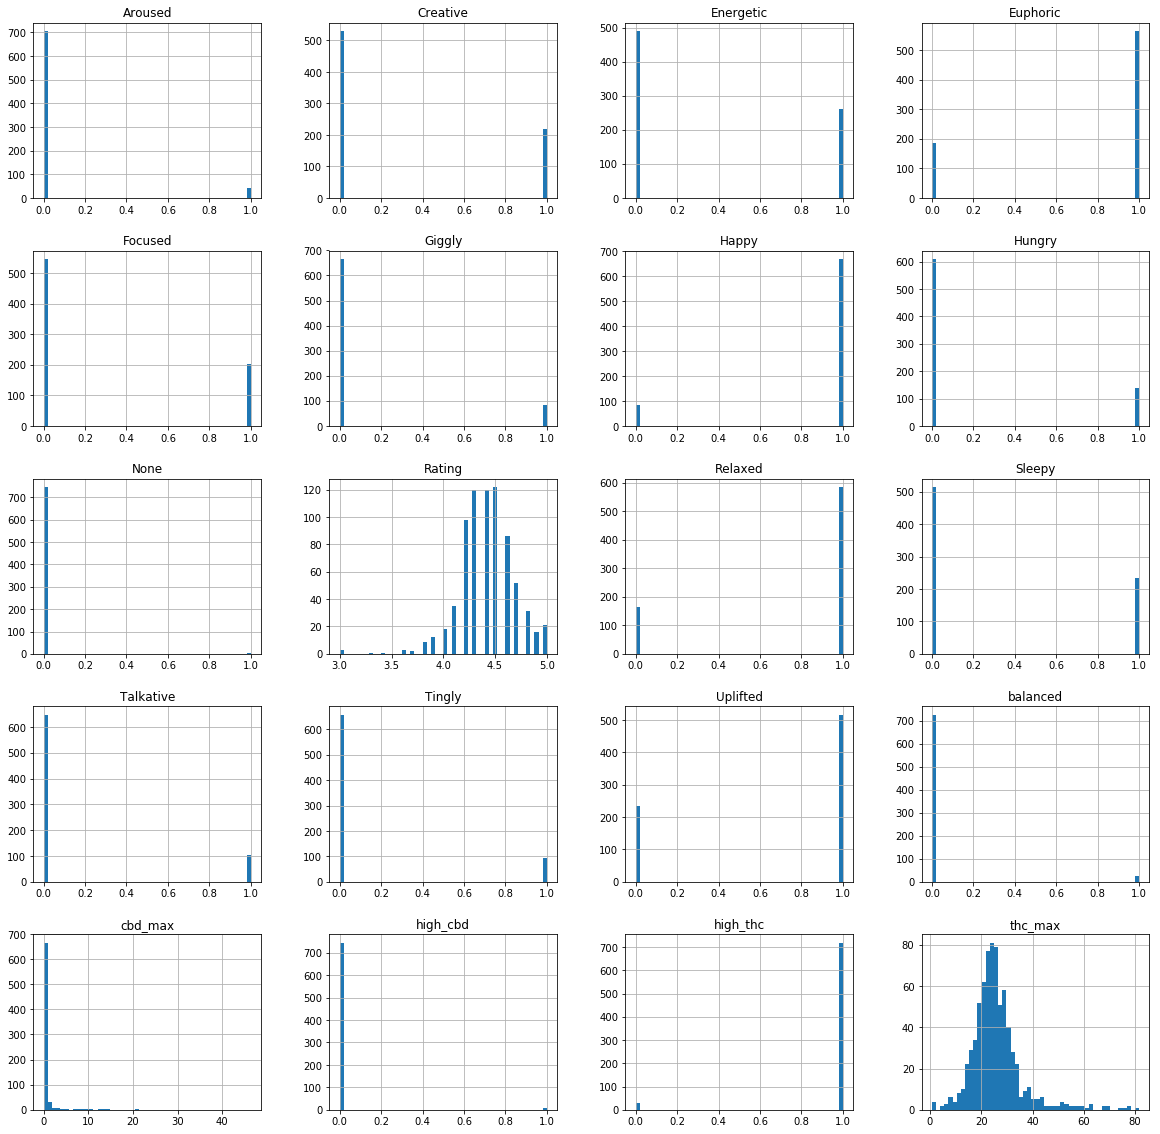

In [72]:
df.hist(figsize=(20, 20), bins=50)
plt.show()

In [73]:
df['sativa'] = 0
df['indica'] = 0
df['hybrid'] = 0

df['sativa'][df['Type'] == 'sativa'] = 1
df['indica'][df['Type'] == 'indica'] = 1
df['hybrid'][df['Type'] == 'hybrid'] = 1

df.head()

,Type,Rating,Effects,thc_max,cbd_max,high_thc,balanced,high_cbd,Focused,Giggly,...,Euphoric,Tingly,None,Relaxed,Hungry,Sleepy,Aroused,sativa,indica,hybrid
1252,hybrid,3.9,"[Relaxed, Hungry, Happy, Euphoric, Uplifted]",21.582383,0.285816,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
823,hybrid,4.4,"[Relaxed, Euphoric, Uplifted, Happy, Creative]",22.355860,0.070160,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
263,hybrid,4.3,"[Euphoric, Uplifted, Relaxed, Tingly, Happy]",25.840926,0.180041,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
636,hybrid,4.2,"[Relaxed, Happy, Euphoric, Uplifted, Hungry]",18.474099,0.168494,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
180,hybrid,4.7,"[Relaxed, Euphoric, Happy, Uplifted, Hungry]",34.605095,0.262401,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


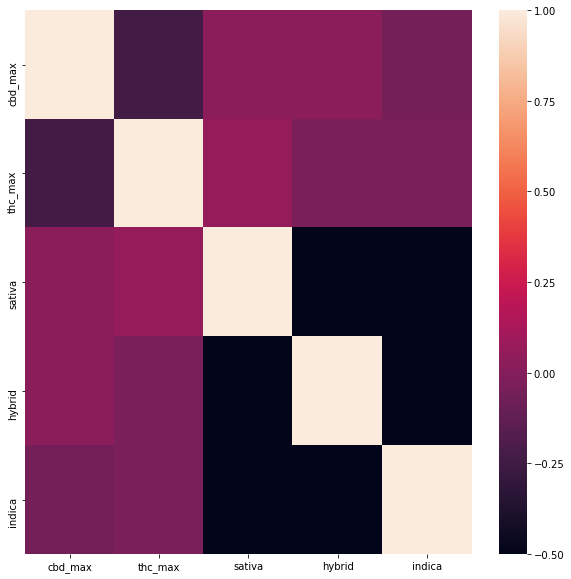

In [74]:
columns = ['cbd_max', 'thc_max', 'sativa', 'hybrid', 'indica']
plt.figure(figsize=(10, 10))
sns.heatmap(df[columns].corr())
plt.show()

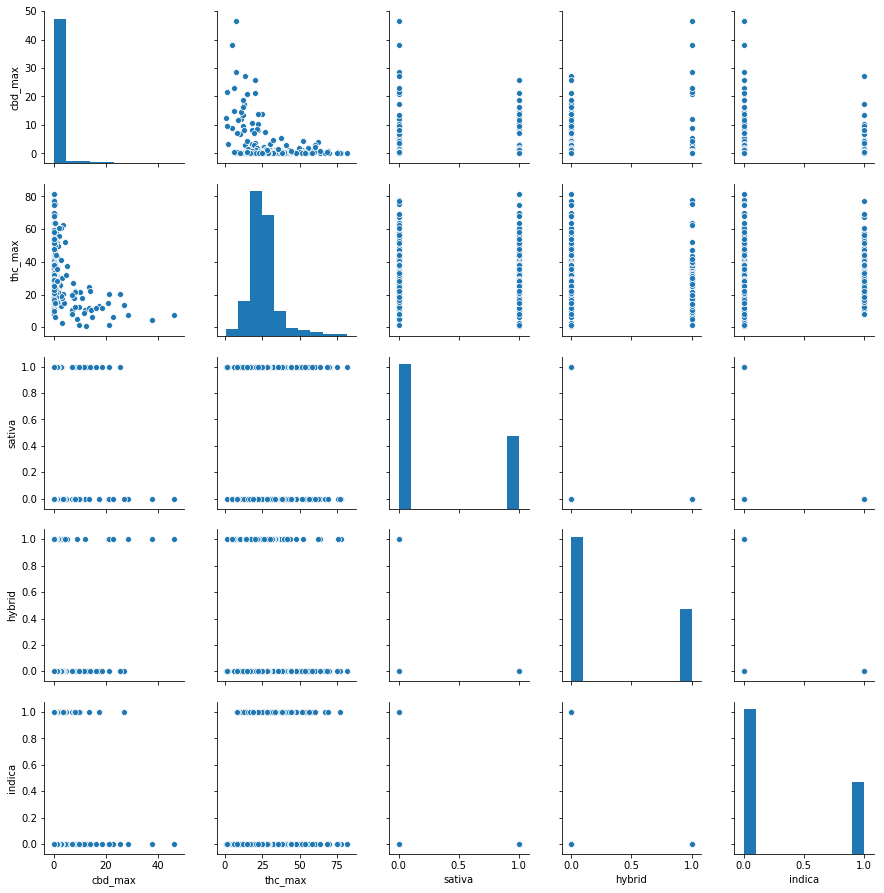

In [75]:
sns.pairplot(data=df[columns])
plt.show()

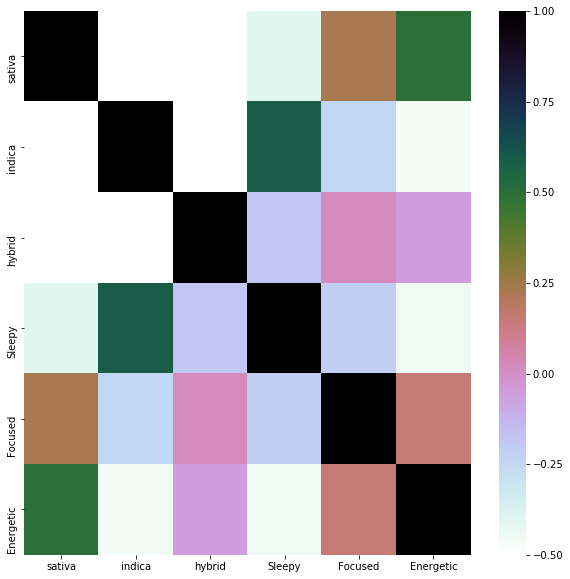

In [76]:
columns = ['sativa', 'indica', 'hybrid', 'Sleepy', 'Focused', 'Energetic']
plt.figure(figsize=(10, 10))
sns.heatmap(df[columns].corr(), cmap='cubehelix_r')
plt.show()

In [77]:
df[columns].corr()

,sativa,indica,hybrid,Sleepy,Focused,Energetic
sativa,1.000000,-0.500000,-0.500000,-0.404483,0.228822,0.507154
indica,-0.500000,1.000000,-0.500000,0.589448,-0.247890,-0.455647
hybrid,-0.500000,-0.500000,1.000000,-0.184965,0.019068,-0.051508
Sleepy,-0.404483,0.589448,-0.184965,1.000000,-0.212653,-0.443741
Focused,0.228822,-0.247890,0.019068,-0.212653,1.000000,0.152867
Energetic,0.507154,-0.455647,-0.051508,-0.443741,0.152867,1.000000


In [78]:
df.shape

(750, 25)

In [80]:
#df.to_csv('./datasets/cannabis2/leafly.csv')